In [1]:
import pandas as pd
import numpy as np

In [155]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In the cell bellow we visualize the first image in the training dataset to ensure the data was loaded correctly.

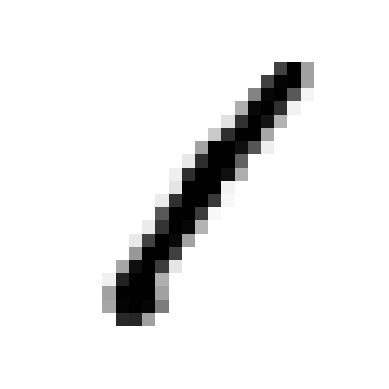

In [4]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

first_digit = train.iloc[0, 1:].values #locating first digit but skipping first column to avoid label 
plot_digit(first_digit)
plt.show()

Looks like the dataset was loaded correctly and the first digit appears to be a 1, but to avoid any uncertainty we can view the label.

In [5]:
train.iloc[0]

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

In [6]:
X_train = train.drop('label', axis = 1)
y_train = train['label']

In [7]:
X_test = test[14000:]
y_test = test[:14000]

Binary Classifier 

In [8]:
y_train_1 = (y_train == 1)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_1)

SGDClassifier(random_state=42)

In [10]:
first_digit_reshaped = first_digit.reshape(1, -1)
y_pred = sgd_clf.predict(first_digit_reshaped)
first_digit_df = pd.DataFrame(first_digit_reshaped, columns=X_train.columns)
print(y_pred)

[ True]


c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


Cross-Validation / Visualization of Why Accuracy is not always the best performance metric for a model

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_1, cv = 3, scoring = 'accuracy')

array([0.98735714, 0.98842857, 0.98671429])

98% accuracy may seem to indicate that we have found a fitting model for our use but there are some flaws with how this model is achieving its result. Since the system determines if a number is either a 1 or not a 1 then since a majority of the numbers in the dataset are not 1 it has most likley learned that it can guess false or not 1 for a majority of the dataset and be right in a majority of cases. The dummy classifier bellow further exemplifies this point.

Dummy Classifier 

In [12]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_1)
print(any(dummy_clf.predict(X_train)))

False


In [13]:
cross_val_score(dummy_clf, X_train, y_train_1, cv = 3, scoring = 'accuracy')

array([0.88842857, 0.8885    , 0.8885    ])

Confusion Matrix 

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv = 3)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_1, y_train_pred)
cm

array([[36908,   408],
       [  117,  4567]])

In [16]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_1, y_train_pred)

np.float64(0.9179899497487437)

In [17]:
recall_score(y_train_1, y_train_pred)

np.float64(0.9750213492741246)

In [18]:
from sklearn.metrics import f1_score
f1_score(y_train_1, y_train_pred)

np.float64(0.9456465472616213)

In [19]:
y_scores = sgd_clf.decision_function([first_digit])
y_scores

c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([11357.70867683])

In [20]:
threshold = 12000
y_first_digit_pred = (y_scores > threshold)
y_first_digit_pred

array([False])

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_1, cv = 3, method = 'decision_function')

In [22]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores)

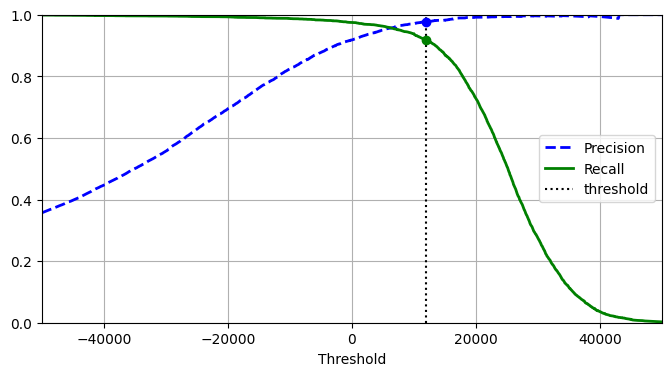

In [23]:
plt.figure(figsize=(8, 4))  
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")


idx = (thresholds >= threshold).argmax()  
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

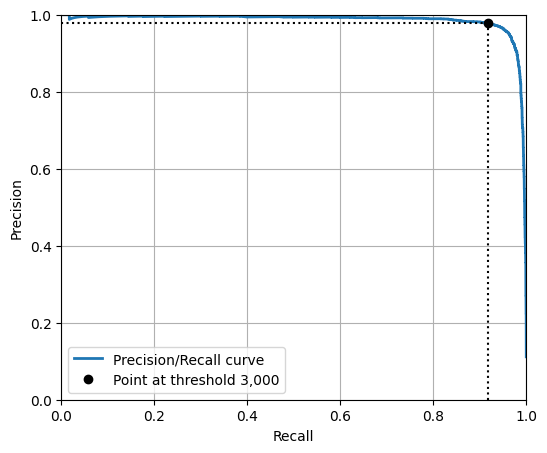

In [24]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")


plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [25]:
idx_for_95_precision = (precisions >= 0.95).argmax()
threshold_for_95_precision = thresholds[idx_for_95_precision]
threshold_for_95_precision

np.float64(4946.403026169807)

In [26]:
y_train_pred_95 = (y_scores >= threshold_for_95_precision)
precision_score(y_train_1, y_train_pred_95)

np.float64(0.9500842459983151)

In [27]:
recall_at_95_precision = recall_score(y_train_1, y_train_pred_95)
recall_at_95_precision

np.float64(0.963065755764304)

Receiver Operating Characteristics (ROC) Curve

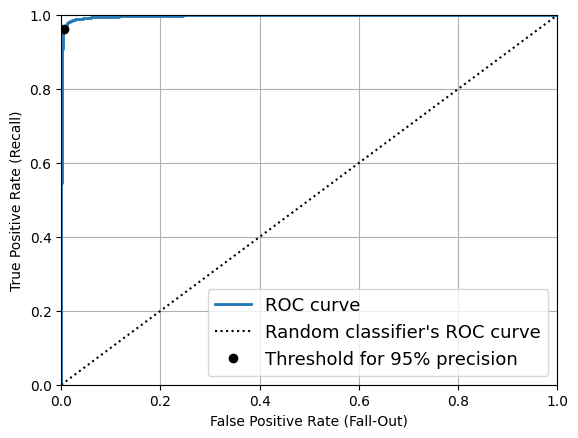

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_1, y_scores)
idx_for_threshold_at_95 = (thresholds <= threshold_for_95_precision).argmax()
tpr_95, fpr_95 = tpr[idx_for_threshold_at_95], fpr[idx_for_threshold_at_95]

plt.plot(fpr, tpr, linewidth = 2, label = "ROC curve")
plt.plot([0,1], [0,1], 'k:', label = "Random classifier's ROC curve")
plt.plot([fpr_95], [tpr_95], "ko", label = "Threshold for 95% precision")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_1, y_scores)

np.float64(0.997680237396422)

Random Forest Classifier for comparison

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [31]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_1, cv = 3, method = "predict_proba")
y_probas_forest[:2]

array([[0.02, 0.98],
       [1.  , 0.  ]])

In [32]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_1, y_scores_forest)

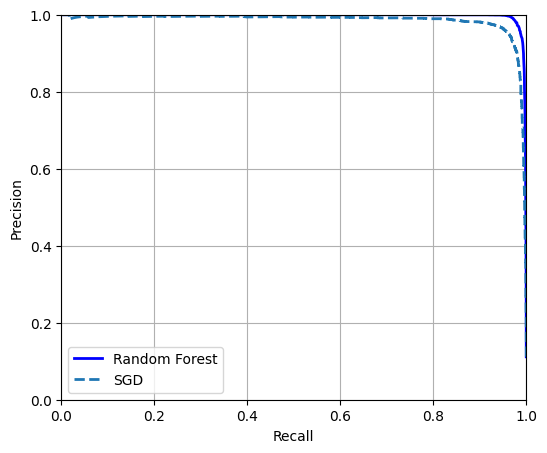

In [33]:
plt.figure(figsize=(6, 5))  

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")


plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [34]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.5
f1_score(y_train_1, y_train_pred_forest)

np.float64(0.9798352124891587)

In [35]:
roc_auc_score(y_train_1, y_scores_forest)

np.float64(0.9993597134368564)

Multiclass Classification

In [36]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [37]:
svm_clf.predict([first_digit])

c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [38]:
first_digit_scores = svm_clf.decision_function([first_digit])
first_digit_scores.round(2)

c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[0.71, 9.31, 8.27, 6.17, 0.72, 5.23, 0.72, 2.75, 7.28, 3.73]])

In [39]:
class_id = first_digit_scores.argmax()
class_id

np.int64(1)

In [40]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
svm_clf.classes_[class_id]

np.int64(1)

OnevsRest Classifier and SGD Classifier for muliclass classificaiton

In [42]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [43]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([first_digit])

c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([1])

In [44]:
sgd_clf.decision_function([first_digit]).round()

c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-40235.,  14191.,  -4244.,  -4171., -24838.,  -8628., -21675.,
        -33189.,  -4580., -20956.]])

In [45]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.87235714, 0.88628571, 0.86264286])

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.90771429, 0.90578571, 0.91192857])

Error Analysis Section

c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


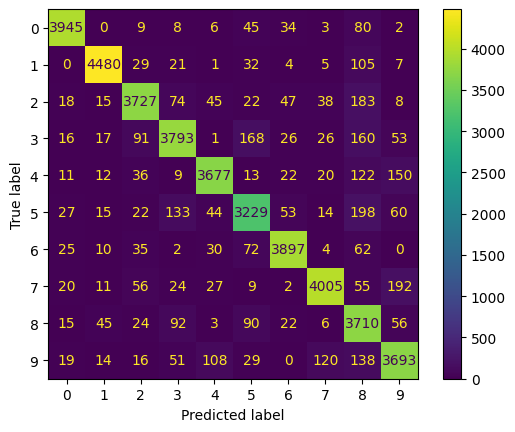

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

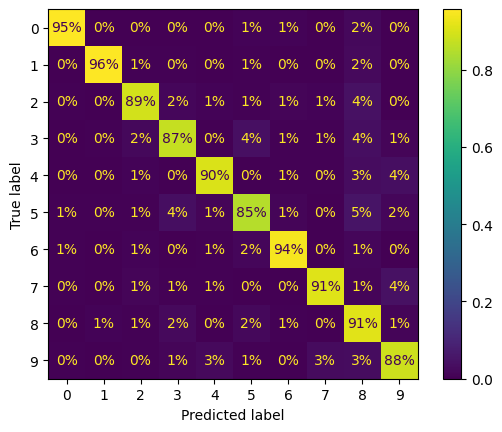

In [48]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize = "true", values_format = ".0%")
plt.show()

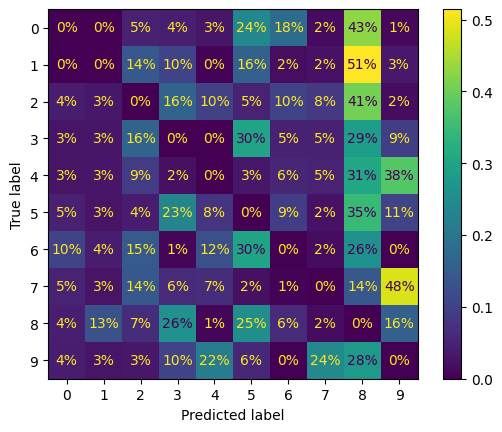

In [49]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight = sample_weight, normalize = "true", values_format = ".0%")
plt.show()

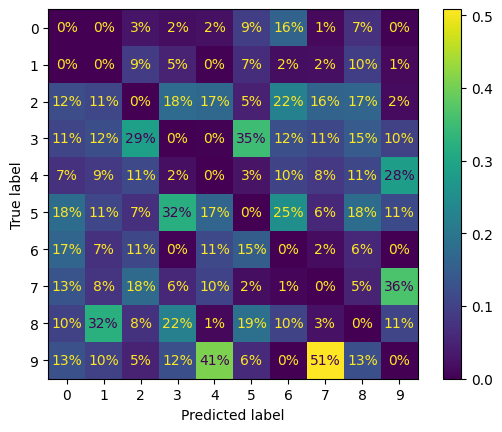

In [50]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight = sample_weight, normalize = "pred", values_format = ".0%")
plt.show()

X_train_numeric shape after cleaning: (42000, 784)
X_aa shape: (3793, 784)
X_ab shape: (168, 784)
X_ba shape: (133, 784)
X_bb shape: (3229, 784)
Images count for label 0,0: 133
Images count for label 1,0: 3229
Images count for label 0,1: 3793
Images count for label 1,1: 168


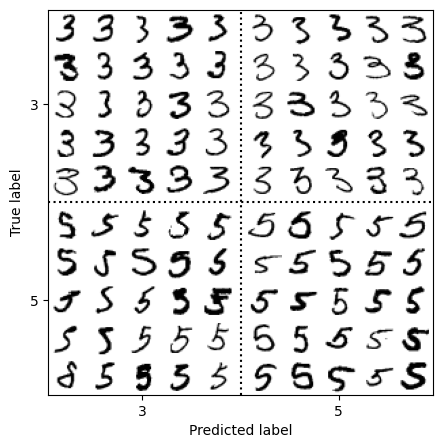

In [51]:
# Numeric classes (matching y_train's values)
cl_a, cl_b = 3, 5  # Use integers instead of strings

# Ensure that X_train contains only numeric pixel data
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')

# Check if any data remains in X_train_numeric
print(f"X_train_numeric shape after cleaning: {X_train_numeric.shape}")

# Select predictions for each true/predicted label combination
X_aa = X_train_numeric[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train_numeric[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train_numeric[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train_numeric[(y_train == cl_b) & (y_train_pred == cl_b)]

# Check the sizes of the filtered datasets
print(f"X_aa shape: {X_aa.shape}")
print(f"X_ab shape: {X_ab.shape}")
print(f"X_ba shape: {X_ba.shape}")
print(f"X_bb shape: {X_bb.shape}")

# Plotting configurations
size = 5  # size of each block of images
pad = 0.2
plt.figure(figsize=(size, size))

# Check if there are any images in each dataset
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)), (X_aa, (0, 1)), (X_ab, (1, 1))]:
    print(f"Images count for label {label_col},{label_row}: {len(images)}")
    
    # Check if images are empty
    if len(images) == 0:
        print(f"No images found for label {label_col},{label_row}. Skipping...")
        continue
    
    # Loop through images and plot
    for idx, image_data in enumerate(images[:size*size].to_numpy()):
        try:
            # Convert each image to a numpy array, ensuring it’s numerical and reshapes correctly
            image_data = image_data.astype(float).reshape(28, 28)

            # Calculate position and plot
            x = idx % size + label_col * (size + pad)
            y = idx // size + label_row * (size + pad)
            plt.imshow(image_data, cmap="binary", extent=(x, x + 1, y, y + 1))
        
        except Exception as e:
            print(f"Error reshaping image data: {e}")
            continue

# Configure axis labels and grid lines
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


Multilabel Classification

In [52]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [53]:
knn_clf.predict([first_digit])

c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [54]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average = 'macro')


np.float64(0.9743879015454757)

In [55]:
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(SVC(), cv = 3, random_state = 42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [56]:
chain_clf.predict([first_digit])

c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ClassifierChain was fitted with feature names
  warnings.warn(


array([[0., 1.]])

Multioutput Classification

In [57]:
np.random.seed(42)
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


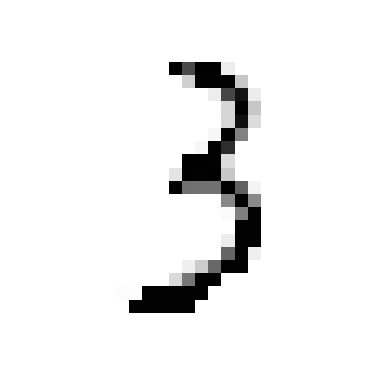

In [58]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.iloc[0]])
plot_digit(clean_digit)
plt.show()

Convolutional Neural Network

In [156]:
from keras.utils import to_categorical
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

Y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [157]:
X_train = X_train / 255.0
test = test / 255.0

In [160]:
X_train = X_train.reshape(-1, 28, 28, 1)
test = test.reshape(-1, 28, 28, 1)

In [161]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

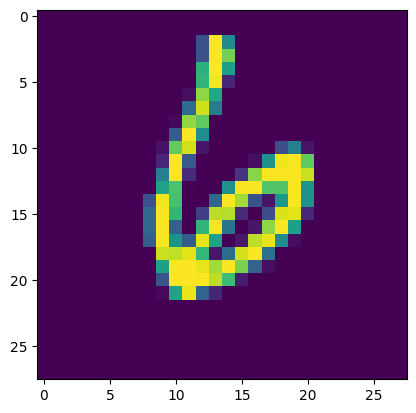

In [163]:
plt.imshow(X_train[0][:,:,0])

Model Creation

In [164]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


c:\Users\krist\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [165]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 887,530 (3.39 MB)

 Trainable params: 887,530 (3.39 MB)

 Non-trainable params: 0 (0.00 B)

In [166]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [167]:
cnnModel = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=64)

Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.8191 - loss: 0.5387 - val_accuracy: 0.9831 - val_loss: 0.0685
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9761 - loss: 0.0813 - val_accuracy: 0.9864 - val_loss: 0.0450
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9836 - loss: 0.0591 - val_accuracy: 0.9876 - val_loss: 0.0419
Epoch 4/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9843 - loss: 0.0505 - val_accuracy: 0.9905 - val_loss: 0.0322
Epoch 5/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9866 - loss: 0.0444 - val_accuracy: 0.9883 - val_loss: 0.0387


Model Evaluation

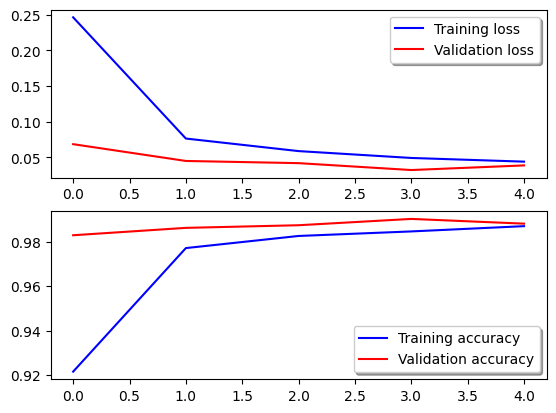

In [168]:
ig, ax = plt.subplots(2, 1)

# Plot the training and validation loss
ax[0].plot(cnnModel.history['loss'], color='b', label="Training loss")
if 'val_loss' in cnnModel.history:
    ax[0].plot(cnnModel.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)

# Plot the training and validation accuracy
ax[1].plot(cnnModel.history['accuracy'], color='b', label="Training accuracy")
if 'val_accuracy' in cnnModel.history:
    ax[1].plot(cnnModel.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)

plt.show()

In [169]:
# Evaluate the model on the test data 
evaluation_metrics = model.evaluate(X_test, y_test)

accuracy = evaluation_metrics[1]  # The accuracy is the second item in the returned list

print("Test Accuracy: ", accuracy)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9799 - loss: 0.0551
Test Accuracy:  0.9869047403335571


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


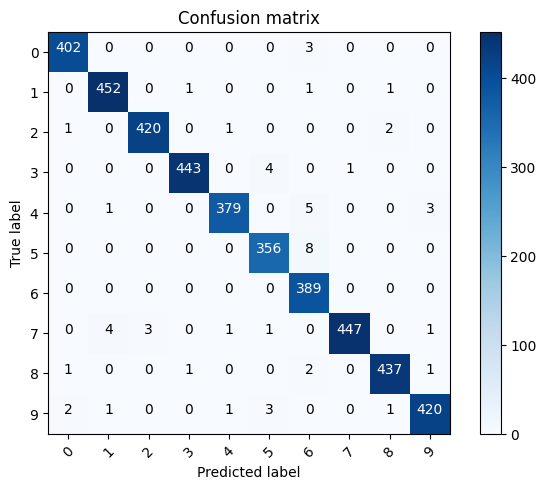

In [170]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

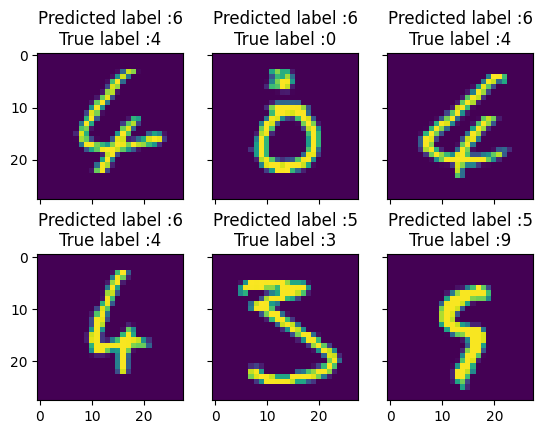

In [171]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

Outputing results for kaggle submission

In [172]:
# Step 1: Get predictions on the test set
predictions = model.predict(test)  # Shape (num_samples, num_classes)

# Step 2: Convert predicted probabilities to class labels (i.e., the index of the max probability)
predicted_labels = np.argmax(predictions, axis=1)

# Step 3: Create a DataFrame for the submission
# Create an 'ImageId' column (the index + 1, since the ImageId starts from 1)
image_ids = np.arange(1, len(predicted_labels) + 1)
submission_df = pd.DataFrame({
    'ImageId': image_ids,
    'Label': predicted_labels
})

# Step 4: Save the DataFrame to a CSV file
submission_df.to_csv('cnn_mnist_submission.csv', index=False)

print("Submission saved to 'cnn_mnist_submission.csv'")

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
Submission saved to 'cnn_mnist_submission.csv'
